

# Simple Self - Attention Block:

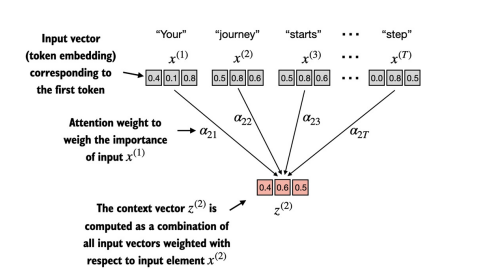

In [4]:
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]] # step (x^6)
)


In [5]:
# For 1 element:

query = inputs[1]
print(f"{query=}")

# calculate the attention socores:
attention_scores = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attention_scores[i] += torch.dot(x_i, query)

print(attention_scores)

# normalise the attention scores:
normalised_attention_scores = torch.softmax(attention_scores, dim=0)
print(normalised_attention_scores)
print(f"sum: {normalised_attention_scores.sum()}")

#calculate the context vector:
context_vector = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vector += normalised_attention_scores[i] * query
print(context_vector)

query=tensor([0.5500, 0.8700, 0.6600])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum: 1.0
tensor([0.5500, 0.8700, 0.6600])


In [6]:
# for all inputs:

# attention scores:
attention_scores = torch.empty(6,6)
# For loops are slow
# for i, x_i in enumerate(inputs):
#     for j, x_j in enumerate(inputs):
#         attention_scores[i][j] = torch.dot(x_i, x_j)
attention_scores = inputs @ inputs.T #faster matrix multiplaction way
print(attention_scores)

# normalised attention scores:
normalised_attention_scores = torch.softmax(attention_scores, dim=1)
print(normalised_attention_scores)

#context vectors:
context_vector = normalised_attention_scores @ inputs
print(context_vector)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# Self Attention with trainable weights:


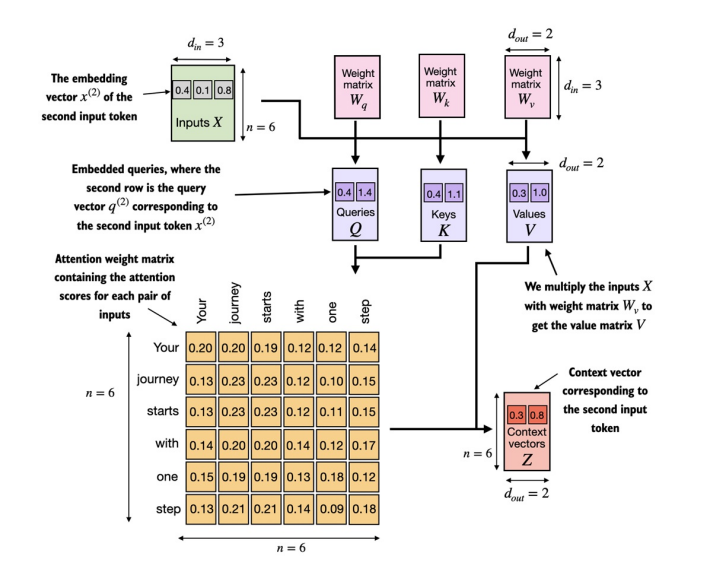

In [7]:
# From attention.py file : Class --> SelfAttention_v1
from attention import SelfAttention_v1

d_in = inputs.shape[1] 
d_out = 2

torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)

print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [8]:
# From attention.py file : Class --> SelfAttention_v2
from attention import SelfAttention_v2

d_in = inputs.shape[1] 
d_out = 2

torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)

print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [9]:
# Assignment:
# correctly assign the weights from an instance of SelfAttention_v2 to an 
# instance of SelfAttention_v1 and verify if results match:

import torch.nn as nn
from attention import SelfAttention_v2
from attention import SelfAttention_v1

d_in = inputs.shape[1] 
d_out = 2
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)

w_query = nn.Parameter(sa_v2.W_query.weight.T)
w_key = nn.Parameter(sa_v2.W_key.weight.T)
w_value = nn.Parameter(sa_v2.W_value.weight.T)

sa_v1 = SelfAttention_v1(d_in, d_out)
sa_v1.W_query = w_query
sa_v1.W_key = w_key
sa_v1.W_value = w_value

print(f"{sa_v1(inputs)=}")
print(f"{sa_v2(inputs)=}")


sa_v1(inputs)=tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)
sa_v2(inputs)=tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


## Causal Attention

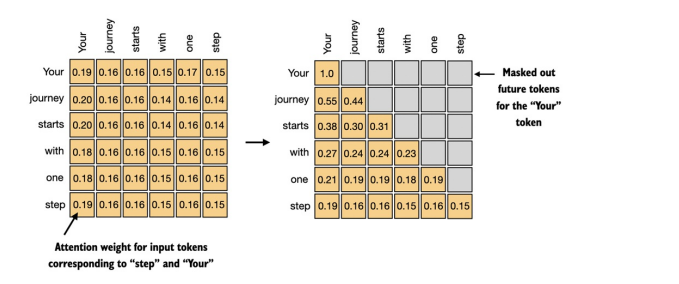

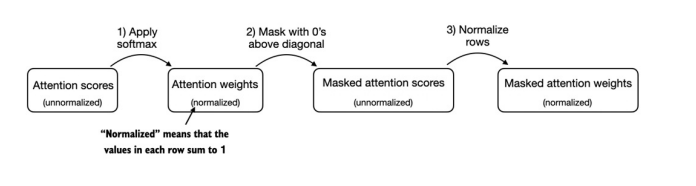

In [10]:

#Steps for masking attention weights:
# STEP 1: Calculate attn weights:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T

attn_weights = torch.softmax(attn_scores/ keys.shape[-1] ** 0.5, dim=1)
print(attn_weights)

# STEP 2: Create Mask and Mask the future attn weights of future elements:
context_length = attn_scores.shape[0]
print(f"{attn_scores.shape=}")

mask_simple = torch.tril(torch.ones(context_length, context_length))
print(f"{mask_simple=}")
masked_weights = attn_weights * mask_simple
print(f"{masked_weights=}")

# STEP 3: Normalise weights:
row_sums = masked_weights.sum(dim=1, keepdim=True)
masked_normalised_weights = masked_weights /row_sums
print(f"{masked_normalised_weights=}")

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)
attn_scores.shape=torch.Size([6, 6])
mask_simple=tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])
masked_weights=tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]]

# masking by -INFINITY:
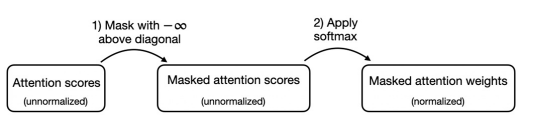

In [11]:
# STEP 1: get attention scores:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T

#Syep 2: Create mask and apply to attn_scores
mask = torch.triu(torch.ones(context_length,context_length), diagonal=1)
print(f"{mask=}")
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(f"{masked=}")

# Step 3: Normalise and get attn weights:
masked_normalised_weights_v2 = torch.softmax(masked/keys.shape[-1] ** 0.5, dim=1)
print(f"{masked_normalised_weights_v2=}")

mask=tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
masked=tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)
masked_normalised_weights_v2=tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<So

## Applying Dropout to Causal attention:

In [12]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) # 50% dropout rate
# example = torch.ones(6,6)
# print(dropout(example))

print(dropout(masked_normalised_weights_v2))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


## Causal Attention Class with Dropout and Batches:

In [13]:
import torch
from attention import CausalAttention

# Create batch of data:
batch = torch.stack((inputs, inputs), dim=0)
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.5)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)
print(context_vecs)



context_vecs.shape: torch.Size([2, 6, 2])
tensor([[[-0.5017, -0.1644],
         [-0.5538, -0.0485],
         [-0.5551, -0.0483],
         [-0.7726, -0.2379],
         [-0.1373, -0.0489],
         [-0.6903, -0.0983]],

        [[-0.6592, -0.0872],
         [-0.1213, -0.0496],
         [-0.4395, -0.0279],
         [-0.6151, -0.1862],
         [-0.3708, -0.1181],
         [-0.5274, -0.1706]]], grad_fn=<UnsafeViewBackward0>)


# MULTI HEAD ATTENTION

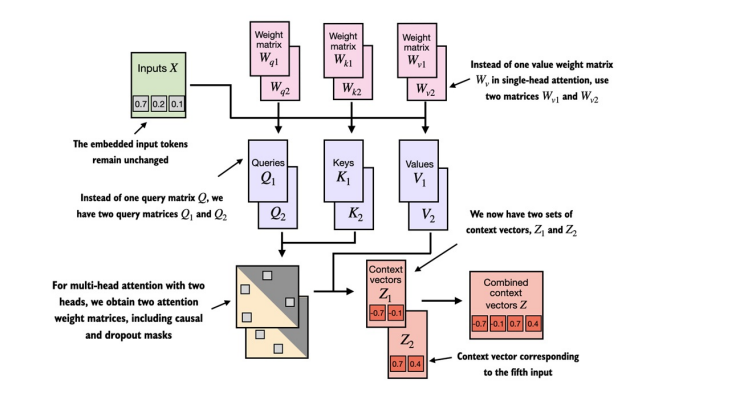

In [14]:
# Using the multi head attention wrapper:
from attention import MutliHeadAttentionWrapper
torch.manual_seed(123)

# Create batch of data:
batch = torch.stack((inputs, inputs), dim=0)

context_length = batch.shape[1]
d_in, d_out = 3,2
dropout = 0.0
num_heads = 2
mha = MutliHeadAttentionWrapper(d_in, d_out, context_length, dropout, num_heads, False)

mha_context_vecs = mha(batch)
print(f"{mha_context_vecs=}")
print(f"{mha_context_vecs.shape=}")

mha_context_vecs=tensor([[[-0.5359, -0.1047,  0.5092,  0.3535],
         [-0.5340, -0.1086,  0.5091,  0.3536],
         [-0.5340, -0.1086,  0.5091,  0.3533],
         [-0.5304, -0.1081,  0.5078,  0.3487],
         [-0.5322, -0.1068,  0.5080,  0.3455],
         [-0.5307, -0.1088,  0.5080,  0.3517]],

        [[-0.5359, -0.1047,  0.5092,  0.3535],
         [-0.5340, -0.1086,  0.5091,  0.3536],
         [-0.5340, -0.1086,  0.5091,  0.3533],
         [-0.5304, -0.1081,  0.5078,  0.3487],
         [-0.5322, -0.1068,  0.5080,  0.3455],
         [-0.5307, -0.1088,  0.5080,  0.3517]]], grad_fn=<CatBackward0>)
mha_context_vecs.shape=torch.Size([2, 6, 4])
